In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# dropping customer id 
df = df.drop(columns= ["customerID"])

In [6]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
#  taking numerical columns TotalCharges , MonthlyCharges,tenure
numerical_coloumn_list = ["TotalCharges" , "MonthlyCharges", "tenure"]
# loooking for unique values
for col in df.columns:
    if col not in numerical_coloumn_list:
        print(col , df[col].unique())
        print("*"*30)

gender ['Female' 'Male']
******************************
SeniorCitizen [0 1]
******************************
Partner ['Yes' 'No']
******************************
Dependents ['No' 'Yes']
******************************
PhoneService ['No' 'Yes']
******************************
MultipleLines ['No phone service' 'No' 'Yes']
******************************
InternetService ['DSL' 'Fiber optic' 'No']
******************************
OnlineSecurity ['No' 'Yes' 'No internet service']
******************************
OnlineBackup ['Yes' 'No' 'No internet service']
******************************
DeviceProtection ['No' 'Yes' 'No internet service']
******************************
TechSupport ['No' 'Yes' 'No internet service']
******************************
StreamingTV ['No' 'Yes' 'No internet service']
******************************
StreamingMovies ['No' 'Yes' 'No internet service']
******************************
Contract ['Month-to-month' 'One year' 'Two year']
******************************
PaperlessBilling

In [8]:
# changing the data type of TotalCharges because it is given as string
# df["TotalCharges"]=df["TotalCharges"].astype(float)
# giving error so missing values are present

In [9]:
missing_value_TotalCharges = df[df["TotalCharges"]==" "]
missing_value_TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
len(missing_value_TotalCharges)

11

In [11]:
# Some rows have tenure = 0, meaning the customer just joined and hasn't been charged yet.
# In those cases, TotalCharges is a blank string (" "), not a number.
# This causes problems when converting TotalCharges to float.
# So I'm replacing blank strings with 0 to fix the issue before type conversion.

df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"}) # here giving as string because all the other values are in string


# changing the data type to float

df["TotalCharges"] = df["TotalCharges"].astype(float)

In [12]:
#  checking the data type changed or not
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
# checking any other have a missing value
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#  checking the class distribution of the target column
print(df["Churn"].value_counts())
# there is imbalance in data but now moving to EDA

Churn
No     5174
Yes    1869
Name: count, dtype: int64


EDA

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical Feature Analysis

In [16]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(5,5))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    # calculate the mean and the median values
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    # add vertical lines for mean and median
    plt.axvline(col_mean,color="red",linestyle = "--" , label = "Mean")
    plt.axvline(col_median , color = "green" , linestyle = "-" , label = "Median")

    plt.legend()

    plt.show()


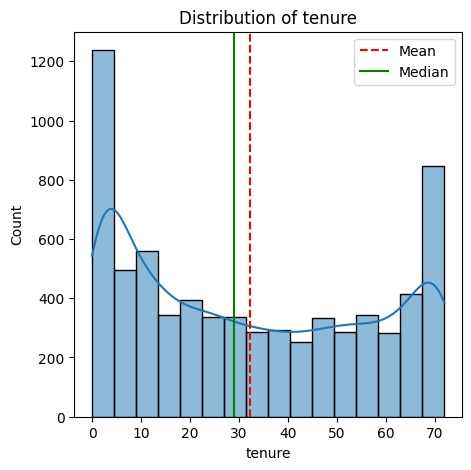

In [17]:
plot_histogram(df,"tenure")

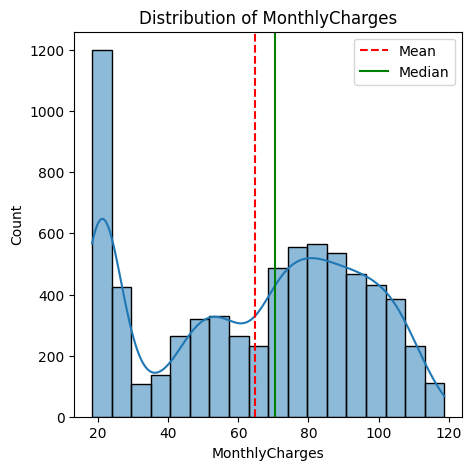

In [18]:
plot_histogram(df,"MonthlyCharges")

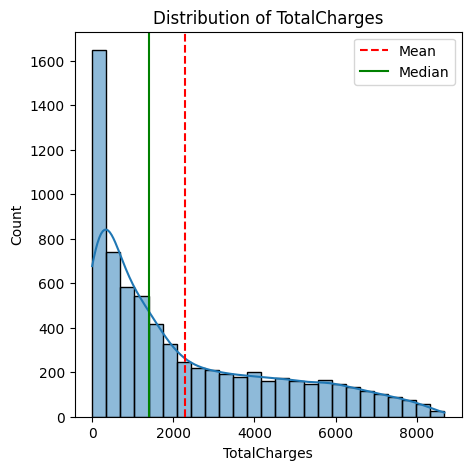

In [19]:
plot_histogram(df,"TotalCharges")

In [20]:
# drawing boxplot to identify outliers
def box_plot(df,column_name):
    plt.figure(figsize=(4,5))
    sns.boxplot(y=df[column_name])
    plt.title(f"distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show()

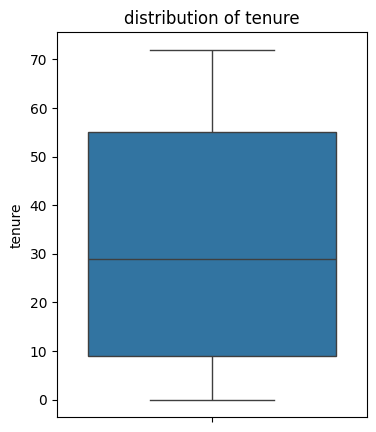

In [21]:
box_plot(df,"tenure")

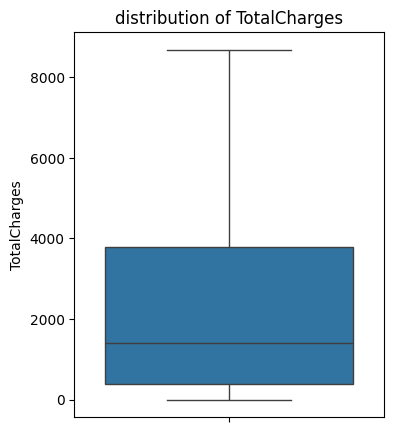

In [22]:
box_plot(df,"TotalCharges")

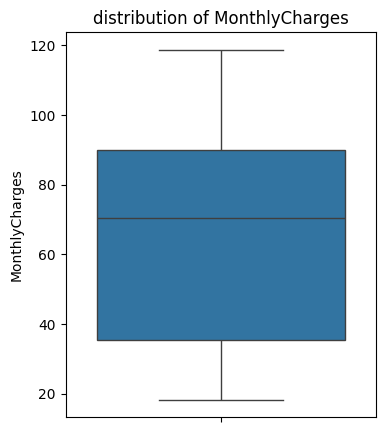

In [23]:
box_plot(df,"MonthlyCharges")

**Corelation Heatmap** for numerical column

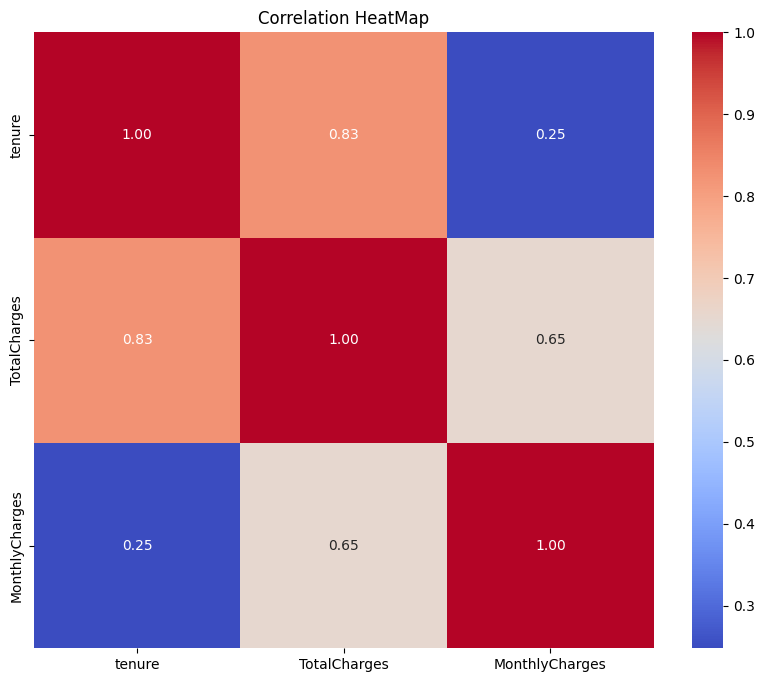

In [24]:
# corelation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[["tenure" , "TotalCharges" ,"MonthlyCharges"]].corr() , annot= True , cmap="coolwarm", fmt=".2f")
plt.title("Correlation HeatMap")
plt.show()

Categorical column Analysis

In [25]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [26]:
# adding SeniorCitizen columns to the object columns
object_cols = ["SeniorCitizen"] + object_cols

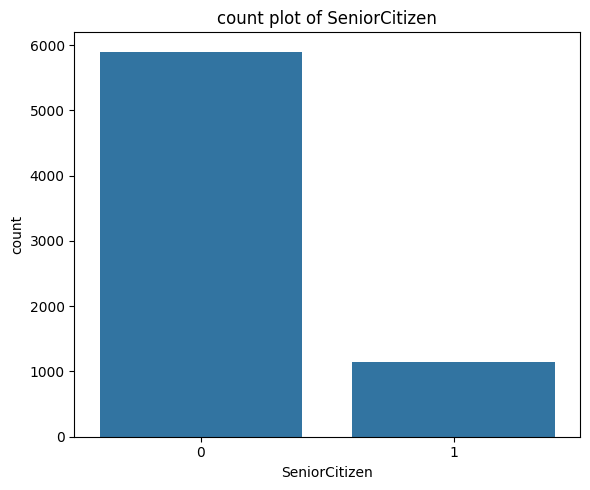

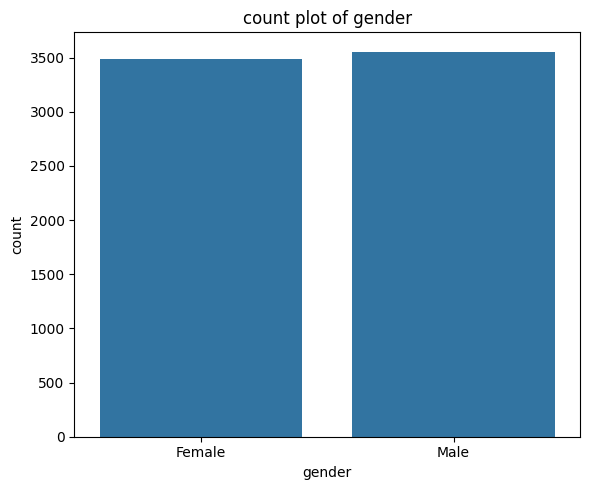

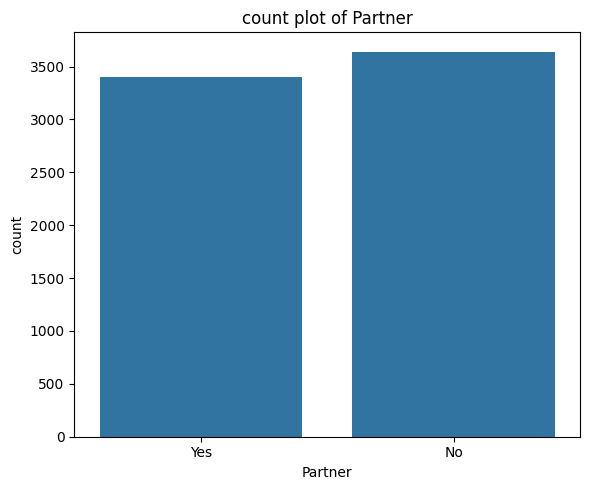

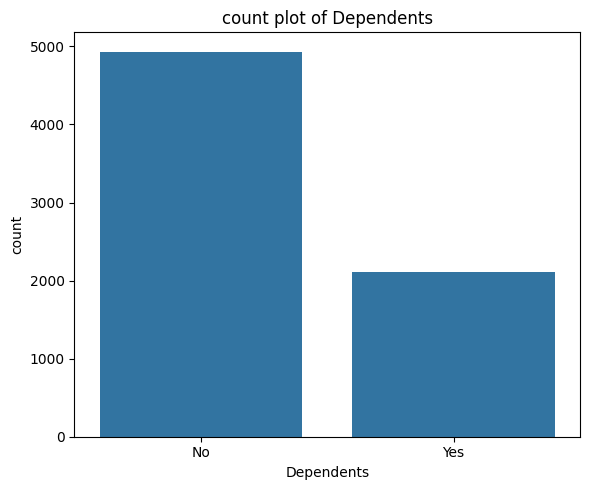

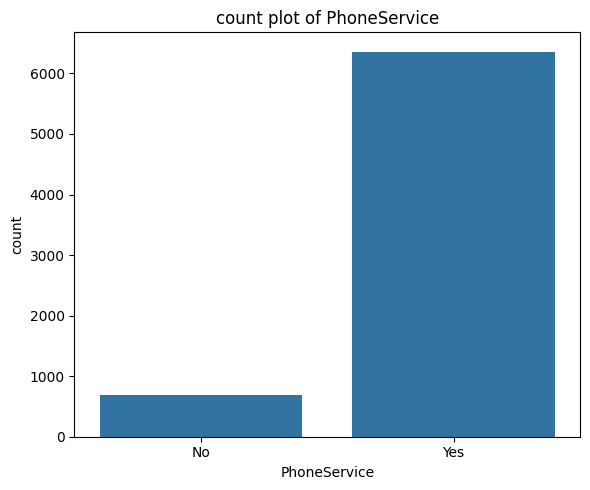

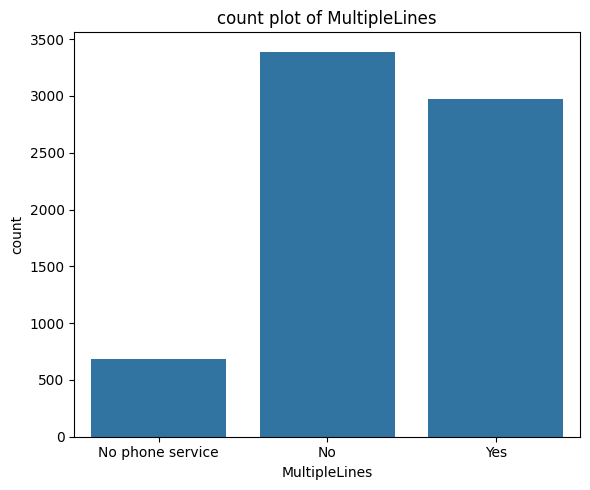

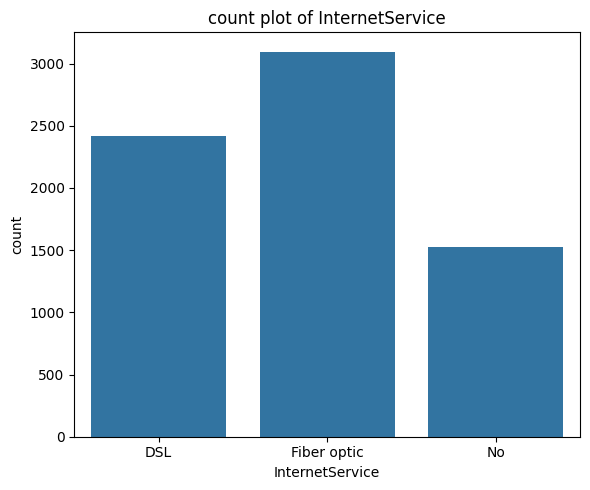

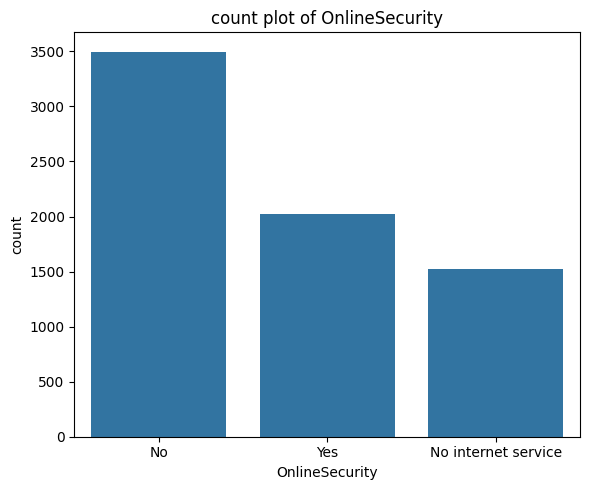

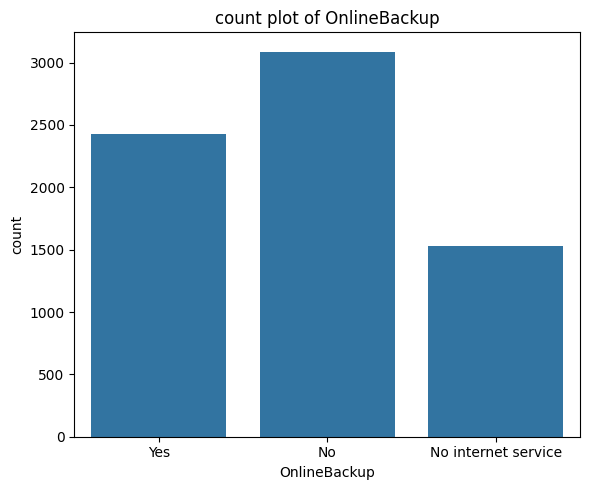

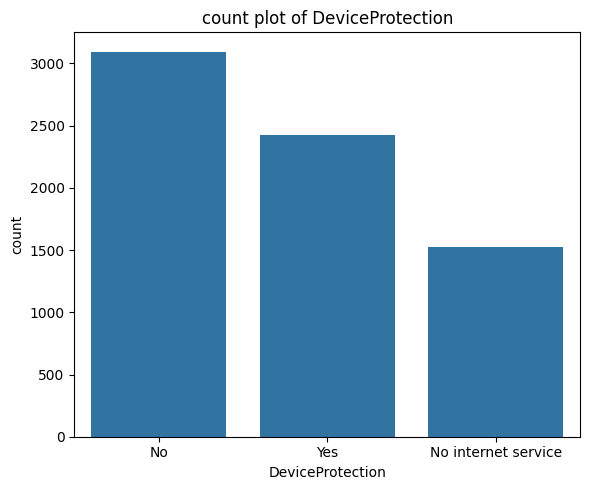

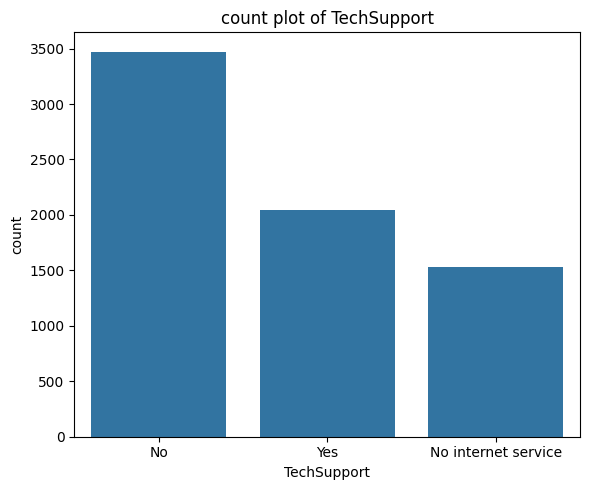

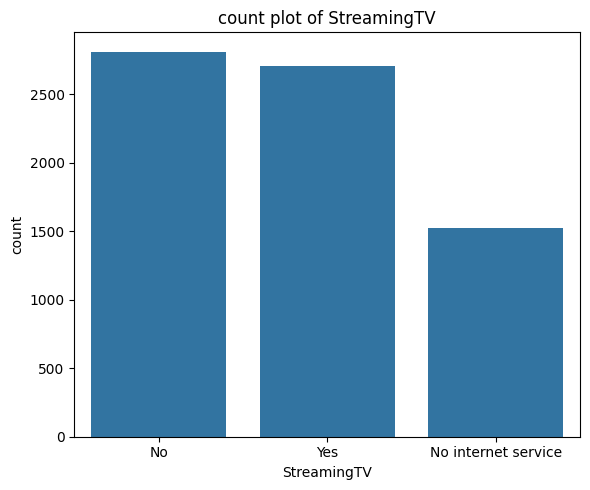

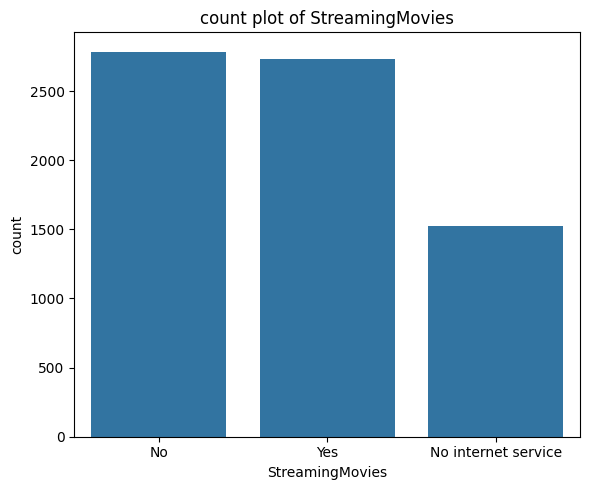

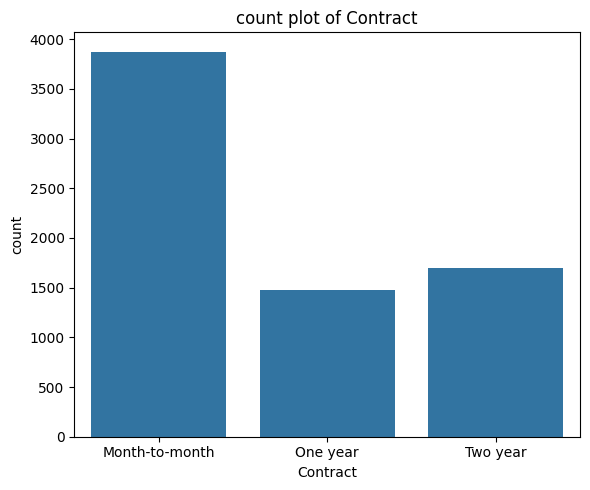

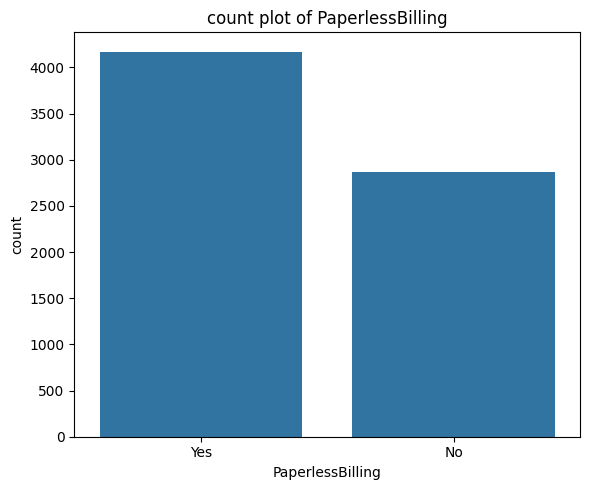

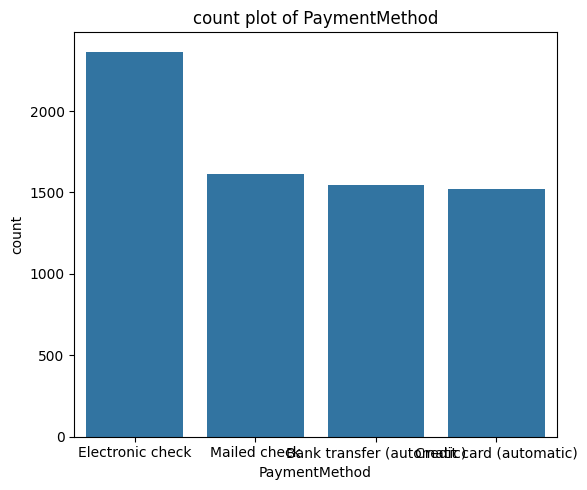

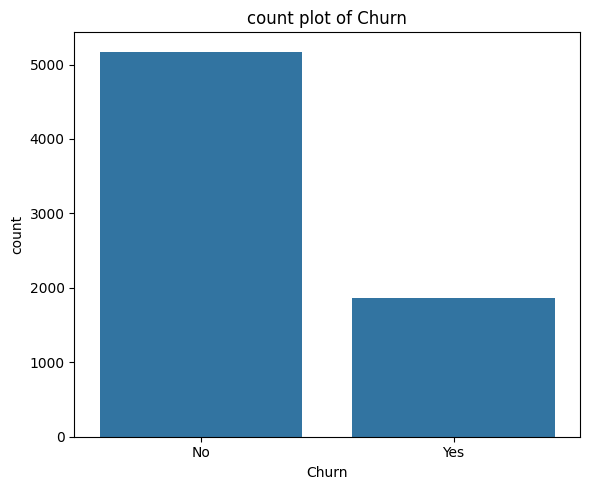

In [27]:
# plotting count plot
for col in object_cols:
    plt.figure(figsize=(6,5))
    sns.countplot(x=df[col])
    plt.title(f"count plot of {col}")
    plt.tight_layout()
    plt.show()

Data preprocessing

In [28]:
# label encoding
df["Churn"] = df["Churn"].replace({"Yes": 1 , "No" : 0}).astype(int)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2308\3953812802.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1 , "No" : 0}).astype(int)


In [29]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [30]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [31]:
# identify the column in which object data
object_columns = df.select_dtypes(include=object).columns
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [32]:
# initialize dictionary to save encoder

encoders= {}
# apply label encoding and store the encoder
for column in object_columns:
    Label_encoder = LabelEncoder()
    df[column] = Label_encoder.fit_transform(df[column])
    encoders[column] = Label_encoder

# save the encoder file as pickle file
with open("encoder.pkl","wb" ) as f:
    pickle.dump(encoders , f)


In [33]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [35]:
# Training and test data Split

x = df.drop(columns=["Churn"])
y = df["Churn"]

In [36]:
print(x.ndim)
print(y.ndim)

2
1


In [37]:
x.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15


In [38]:
# split training and splitting data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [39]:
y_train.shape

(5634,)

In [40]:
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

Applying Synthetic Minority Oversampling Techniques (SMOTE)

In [41]:
smote = SMOTE(random_state=42)

In [42]:
x_train_smote , y_train_smote = smote.fit_resample(x_train , y_train)

In [43]:
y_train_smote. shape

(8278,)

In [44]:
y_train_smote.value_counts()

Churn
0    4139
1    4139
Name: count, dtype: int64

Model Training

In [45]:
# creating Dictionary of models
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "XG Boost" : XGBClassifier(random_state=42)
}

In [46]:
cv_score={} # Dictionary to store cross validation key

# perform 5 fold model validation for each model
for model_name,model in models.items():
    print(f"Training   {model_name} with default parameters .......")
    scores = cross_val_score(model,x_train_smote,y_train_smote, cv= 5, scoring="accuracy")
    cv_score[model_name] = scores
    print(f"{model_name} Cross Validation Accuracy : {np.mean(scores):.2f}")
    print("-"*50)

Training   Decision Tree with default parameters .......
Decision Tree Cross Validation Accuracy : 0.78
--------------------------------------------------
Training   Random Forest with default parameters .......
Random Forest Cross Validation Accuracy : 0.84
--------------------------------------------------
Training   XG Boost with default parameters .......
XG Boost Cross Validation Accuracy : 0.83
--------------------------------------------------


In [47]:
cv_score

{'Decision Tree': array([0.70591787, 0.71497585, 0.84541063, 0.82960725, 0.82839879]),
 'Random Forest': array([0.75181159, 0.76811594, 0.90277778, 0.8918429 , 0.88459215]),
 'XG Boost': array([0.72403382, 0.75120773, 0.90640097, 0.88821752, 0.89003021])}

In [48]:
# random forest gives highest accuracy compared to other model with default parameters

rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [49]:
y_test_pred = rfc.predict(x_test)

print(f"Accuracy Score :\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_test_pred))
print("Classification Report : \n", classification_report(y_test,y_test_pred))

Accuracy Score :
 0.7785663591199432
Confusion Matrix : 
 [[877 158]
 [154 220]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [50]:
# save the rfc model as a pickle file
model_data = {"model": rfc , "features_names" : x.columns.to_list()}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(rfc,f)

In [51]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_smote, y_train_smote)

best_model = grid_search.best_estimator_


In [52]:
best_model

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)

In [53]:
y_test_pred_best = best_model.predict(x_test)

print(f"Accuracy Score :\n",accuracy_score(y_test,y_test_pred_best))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_test_pred_best))
print("Classification Report : \n", classification_report(y_test,y_test_pred_best))

Accuracy Score :
 0.78708303761533
Confusion Matrix : 
 [[876 159]
 [141 233]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.59      0.62      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

